In [115]:
#solution :1

import numpy as np
import pandas as pd      
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
file=pd.read_csv("marketing_data.csv")
file.sample(5)


ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
1927  5253        1956      Master       Together  $54,603.00         1   
370   3766        1959      Master          Widow  $33,051.00         0   
1013  2561        1966  Graduation         Single  $63,810.00         0   
151   6343        1959  Graduation        Married  $79,823.00         0   
1031  1184        1968         PhD       Divorced  $69,674.00         0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
1927         1    7/9/2013       85       145  ...                  4   
370          0   8/16/2012       15       100  ...                  8   
1013         1  11/11/2012       45       977  ...                 12   
151          1   3/31/2014        6       835  ...                  7   
1031         2   5/22/2013       46       554  ...                 10   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
1927                  7             0             0             0   
370                   9             0             0             0   
1013                  8             0             1             0   
151                   2             0             1             0   
1031                  5             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  
1927             0             0         0         0       SP  
370              0             0         1         0       SP  
1013             0             0         0         0      GER  
151              0             0         0         0      AUS  
1031             0             0         0         0       SA  

[5 rows x 28 columns]

In [116]:
#Solution:2
import seaborn as sns


#(i)

print(file.info())
#data ranges from 0 to 2239 rows having total 2240 entries. Data varies as 23 int64 and 5 object datatypes
print("\nDescription table\n",file.describe())
#(ii) shows 50% data lies in '50% index row in the below the description table'
#(iii)shows all rows lower, middle, upper data ranging from 25% to 75% in the below describe table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [117]:
#solution:(3)
file.isnull()
#there is no missing values in the dataset

ID  Year_Birth  Education  Marital_Status  Income   Kidhome  \
0     False       False      False           False    False    False   
1     False       False      False           False    False    False   
2     False       False      False           False    False    False   
3     False       False      False           False    False    False   
4     False       False      False           False    False    False   
...     ...         ...        ...             ...      ...      ...   
2235  False       False      False           False    False    False   
2236  False       False      False           False    False    False   
2237  False       False      False           False    False    False   
2238  False       False      False           False    False    False   
2239  False       False      False           False    False    False   

      Teenhome  Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0        False        False    False     False  ...              False   
1        False        False    False     False  ...              False   
2        False        False    False     False  ...              False   
3        False        False    False     False  ...              False   
4        False        False    False     False  ...              False   
...        ...          ...      ...       ...  ...                ...   
2235     False        False    False     False  ...              False   
2236     False        False    False     False  ...              False   
2237     False        False    False     False  ...              False   
2238     False        False    False     False  ...              False   
2239     False        False    False     False  ...              False   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                 False         False         False         False   
1                 False         False         False         False   
2                 False         False         False         False   
3                 False         False         False         False   
4                 False         False         False         False   
...                 ...           ...           ...           ...   
2235              False         False         False         False   
2236              False         False         False         False   
2237              False         False         False         False   
2238              False         False         False         False   
2239              False         False         False         False   

      AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  
0            False         False     False     False    False  
1            False         False     False     False    False  
2            False         False     False     False    False  
3            False         False     False     False    False  
4            False         False     False     False    False  
...            ...           ...       ...       ...      ...  
2235         False         False     False     False    False  
2236         False         False     False     False    False  
2237         False         False     False     False    False  
2238         False         False     False     False    False  
2239         False         False     False     False    False  

[2240 rows x 28 columns]

In [181]:


#solution :(4)



import numpy as np
import pandas as pd      
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
file=pd.read_csv("marketing_data.csv")

#len(file[file.duplicated()])
#print(file.head())
#file.get('Income', default=0)
file.iloc[:,4]=file.iloc[:,4].str.replace("$",'')
file.iloc[:,4]=file.iloc[:,4].str.replace(",",'').astype(float)
print(file.iloc[:,4])
file.dtypes
file['Dt_Customer']=file['Dt_Customer'].str.replace("/",'').astype(float)
print(file['Dt_Customer'])
print("\n\n")
file.head()

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income , Length: 2240, dtype: float64
0        6162014.0
1        6152014.0
2        5132014.0
3        5112014.0
4         482014.0
           ...    
2235      372013.0
2236     1222013.0
2237     1232012.0
2238    11292012.0
2239      912012.0
Name: Dt_Customer, Length: 2240, dtype: float64





ID  Year_Birth   Education Marital_Status  Income   Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

   Dt_Customer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0    6162014.0        0       189  ...                  6                  1   
1    6152014.0        0       464  ...                  7                  5   
2    5132014.0        0       134  ...                  5                  2   
3    5112014.0        0        10  ...                  2                  7   
4     482014.0        0         6  ...                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

   Response  Complain  Country  
0         1         0       SP  
1         1         0       CA  
2         0         0       US  
3         0         0      AUS  
4         1         0       SP  

[5 rows x 28 columns]

In [228]:
#solutin:(5)

file['Age']= 2023- file['Year_Birth']
print("Age\n\n",file['Age'])


file['Total_purchase']=file.iloc[:,15] +file.iloc[:,16]+file.iloc[:,17]+file.iloc[:,18]
print("Total_purchase\n\n",file['Total_purchase'])


Age

 0       53
1       62
2       65
3       56
4       34
        ..
2235    47
2236    46
2237    47
2238    45
2239    54
Name: Age, Length: 2240, dtype: int64
Total_purchase

 0       15
1       18
2       11
3        4
4        8
        ..
2235    20
2236     5
2237    14
2238    20
2239    18
Name: Total_purchase, Length: 2240, dtype: int64


In [481]:
#solution(6) (a)


Total_amount=file.iloc[:,9]+file.iloc[:,10] +file.iloc[:,11]+file.iloc[:,12]+file.iloc[:,13]+file.iloc[:,14]
print("\n\nTotal_amount\n\n",Total_amount)


#solution(6) (b)
file['Percentage_wine']=(file.iloc[:,9]/Total_amount)*100
display(file['Percentage_wine'].head(2))
file['Percentage_fruits']=(file.iloc[:,10]/Total_amount)*100
display(file['Percentage_fruits'].head(2))
file['Percentage_meat']=(file.iloc[:,11]/Total_amount)*100
display(file['Percentage_meat'].head(2))
file['Percentage_fish']=(file.iloc[:,12]/Total_amount)*100
display(file['Percentage_fish'].head(2))
file['Percentage_sweet']=(file.iloc[:,13]/Total_amount)*100
display(file['Percentage_sweet'].head(2))
file['Percentage_gold']=(file.iloc[:,14]/Total_amount)*100
display(file['Percentage_gold'].head(2))



Total_amount

 0       1190
1        577
2        251
3         11
4         91
        ... 
2235     689
2236      55
2237     309
2238    1383
2239    1078
Length: 2240, dtype: int64


0    15.882353
1    80.415945
Name: Percentage_wine, dtype: float64

0    8.739496
1    0.866551
Name: Percentage_fruits, dtype: float64

0    31.848739
1    11.091854
Name: Percentage_meat, dtype: float64

0    9.327731
1    1.213172
Name: Percentage_fish, dtype: float64

0    15.882353
1     0.000000
Name: Percentage_sweet, dtype: float64

0    18.319328
1     6.412478
Name: Percentage_gold, dtype: float64

In [266]:
#solution: (7)(a)
file['Total_purchase']=file.iloc[:,15]+file.iloc[:,16] +file.iloc[:,17]+file.iloc[:,18]
display("\n\nTotal_purchase\n\n", file['Total_purchase'])


#solution(7) (b)
file['Percentage_deals_purchase']=(file.iloc[:,15]/file['Total_purchase'])*100
display(file['Percentage_deals_purchase'].head(2))
file['Percentage_web_purchase']=(file.iloc[:,16]/file['Total_purchase'])*100
display(file['Percentage_web_purchase'].head(2))
file['Percentage_catalog_purchase']=(file.iloc[:,17]/file['Total_purchase'])*100
display(file['Percentage_catalog_purchase'].head(2))
file['Percentage_store_purchase']=(file.iloc[:,18]/file['Total_purchase'])*100
display(file['Percentage_store_purchase'].head(2))


'\n\nTotal_purchase\n\n'

0       15
1       18
2       11
3        4
4        8
        ..
2235    20
2236     5
2237    14
2238    20
2239    18
Name: Total_purchase, Length: 2240, dtype: int64

0    6.666667
1    5.555556
Name: Percentage_deals_purchase, dtype: float64

0    26.666667
1    38.888889
Name: Percentage_web_purchase, dtype: float64

0    26.666667
1    16.666667
Name: Percentage_catalog_purchase, dtype: float64

0    40.000000
1    38.888889
Name: Percentage_store_purchase, dtype: float64

<Axes: xlabel='ID'>

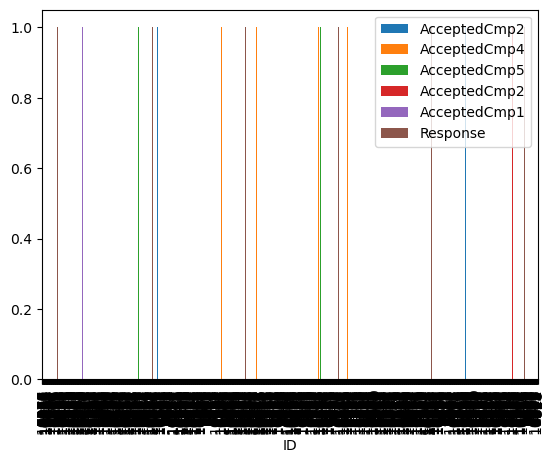

In [297]:
#solution:(8)
file.plot(x='ID',y=['AcceptedCmp2','AcceptedCmp4','AcceptedCmp5','AcceptedCmp2','AcceptedCmp1','Response'], kind="bar")
#last campaign is most successful
# plt.show()

<Axes: >

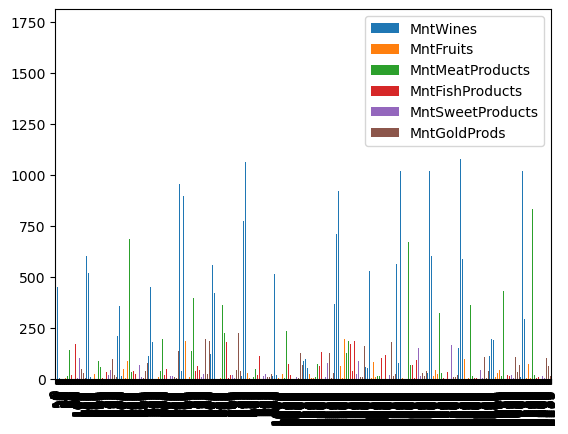

In [314]:
#solution:(9)
file.plot(x=file.get('Income'),y=['MntWines','MntFruits','MntMeatProducts' ,'MntFishProducts','MntSweetProducts','MntGoldProds'], kind="bar")
#mntwines is performing least and MntSweet is performing best

<Axes: xlabel='Age', ylabel='Response'>

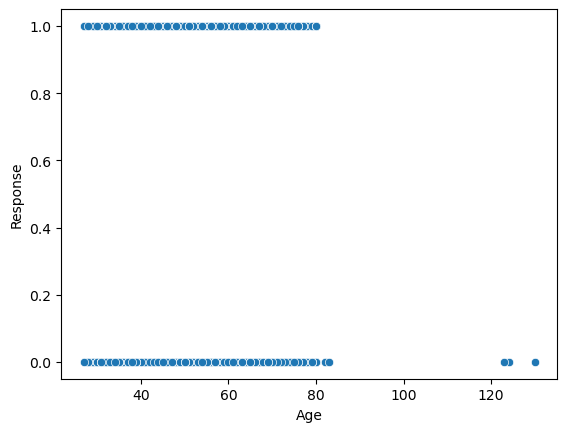

In [322]:
#solutin:(10)
sns.scatterplot(x=file['Age'],y=file['Response'])
#lastcampaigning response for acceptance (1) and rejection(0) follows same pattern excluding some exception in rejection response 


In [480]:
#solution:11

result=file[file['Response']==1].groupby('Country').count()
result['Response']
#Country Sp has  has the most number of customers who accepted the last campaign




Country
AUS     23
CA      38
GER     17
IND     13
ME       2
SA      52
SP     176
US      13
Name: Response, dtype: int64

<Axes: xlabel='Total_amount', ylabel='Dependents'>

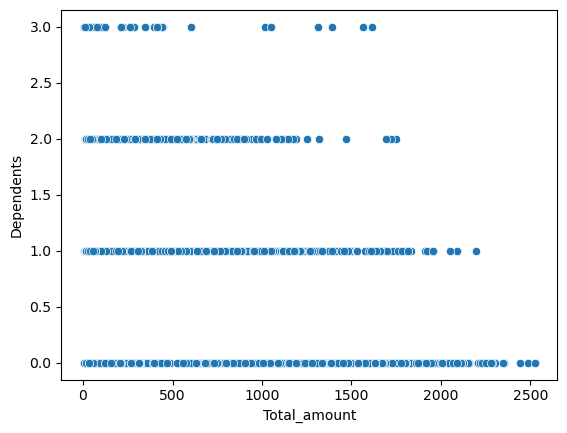

In [531]:
#solution:12 (i)
file['Total_amount']
file1=file.copy()
file1['Dependents']=file1['Kidhome']+file1['Teenhome']
sns.scatterplot(x=file1['Total_amount'],y=file1['Dependents'])

#Discontinuity in total amount values increases with the increase in dependents values. There is a linear pattern found between two dependents vs Tota_amount


Axes(0.125,0.11;0.775x0.77)


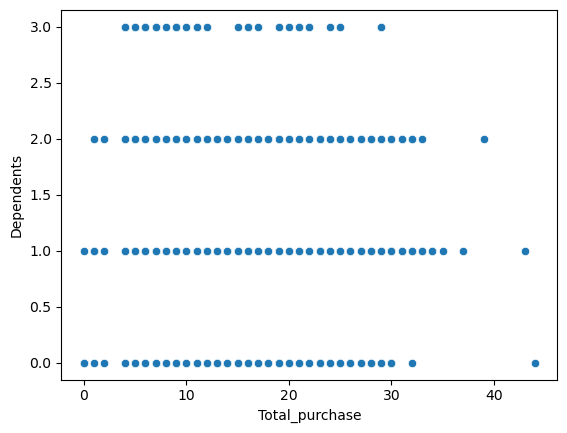

In [509]:
#solution:12 (ii)
print(sns.scatterplot(x=file1['Total_purchase'],y=file1['Dependents']))
#dicrete total purchase values as per dependents values  and discreate linear pattern found between dependent and total_amount on given data.

<Axes: >

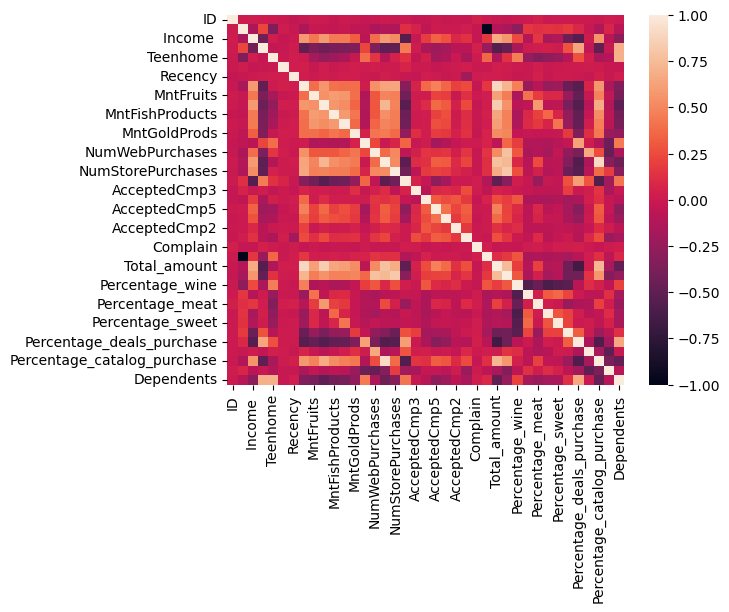

In [530]:
#solution:(13) 
corr = file1.corr()
sns.heatmap(corr)
#diagonal of the map shows strongly correlated segment


In [523]:
#Solutin: (14)
result1=file[file['Complain']==1].groupby('Education').count()
result1.iloc[:,2]
#Graduation is the education background of the  customers who have registered the most number of complaints

Education
2n Cycle       4
Graduation    14
Master         2
PhD            1
Name: Marital_Status, dtype: int64

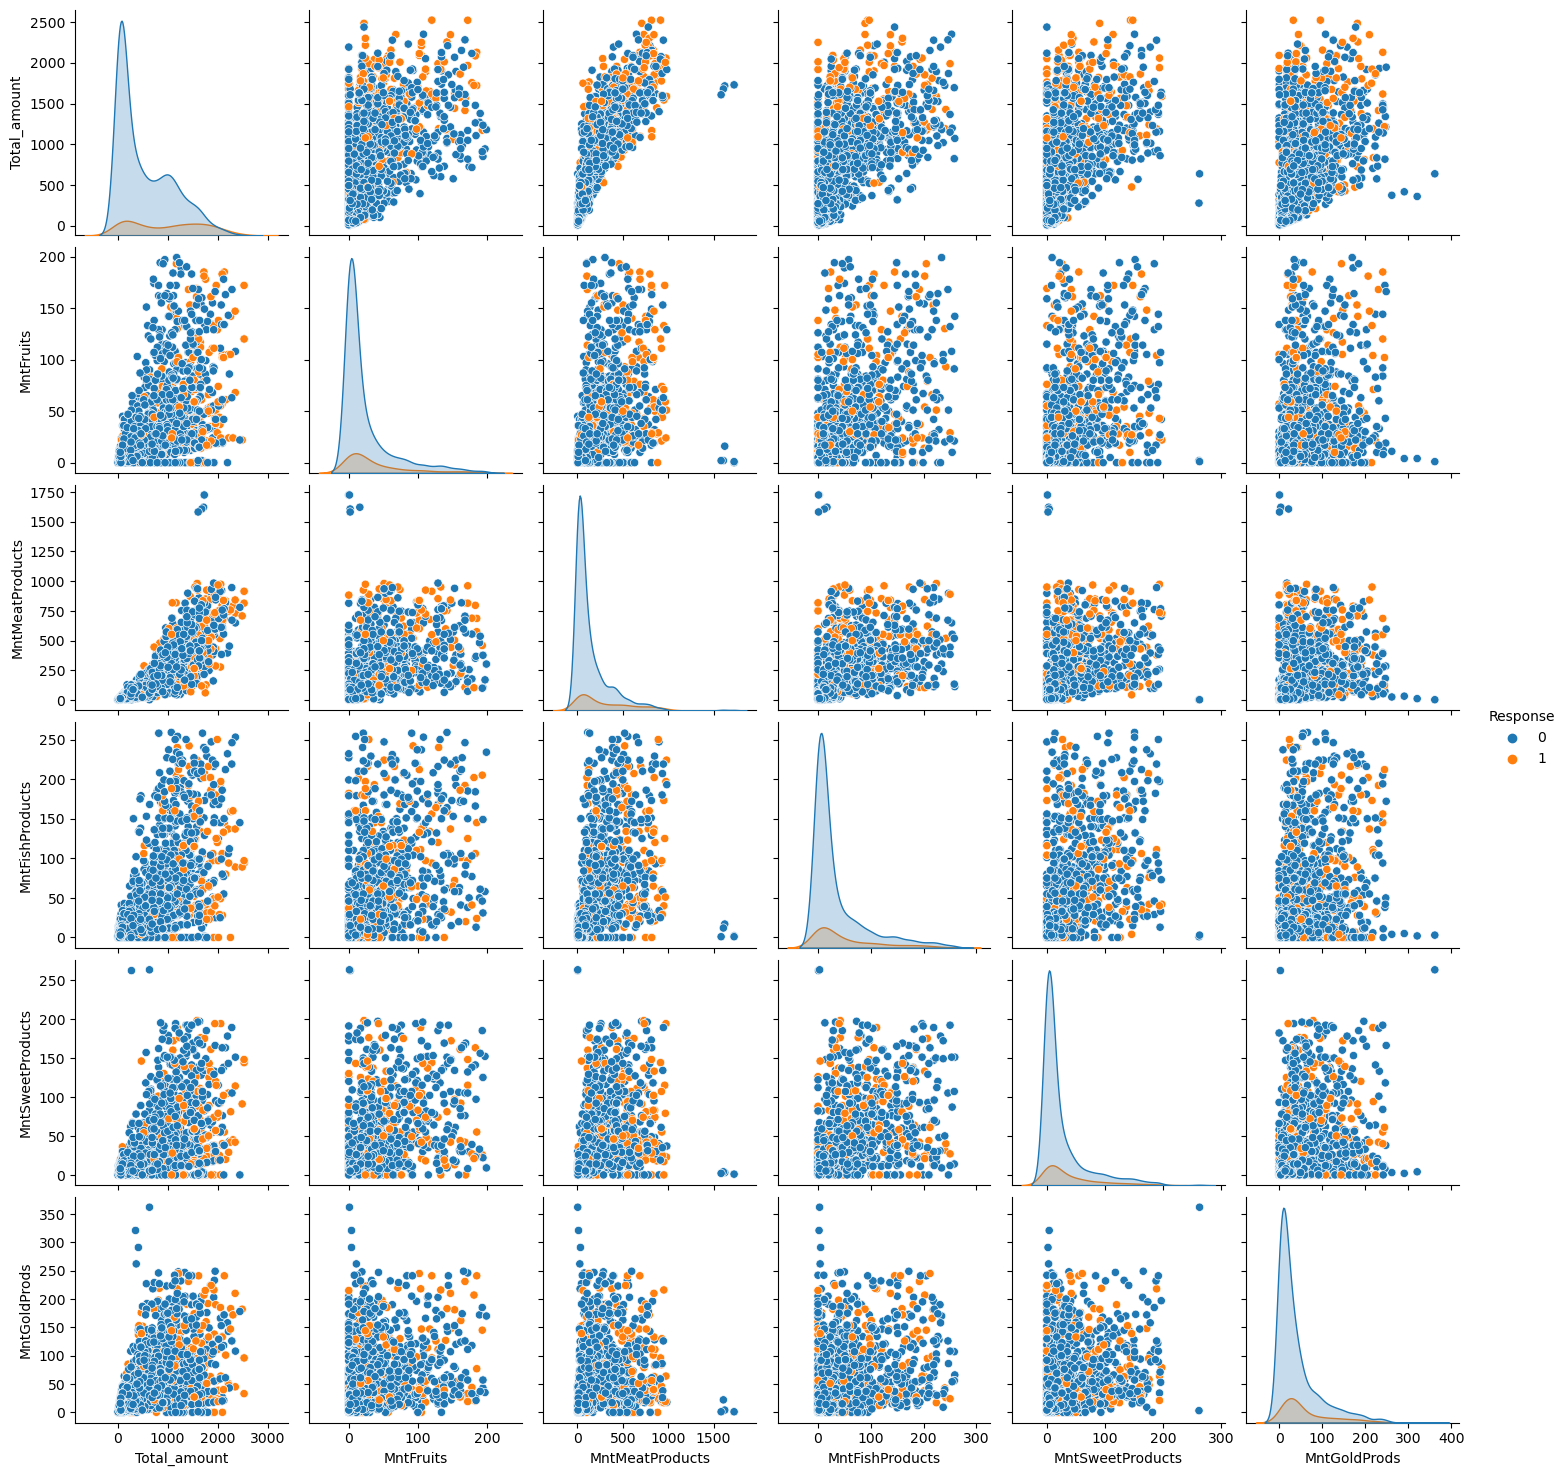

In [527]:
#Solution: 15 (i)
sns.pairplot(file, hue='Response', vars=['Total_amount','MntFruits', 'MntMeatProducts', 'MntFishProducts',
'MntSweetProducts' , 'MntGoldProds'])
#number of response '0' is more than response '1' and outliers in univariate graph (digaonals graph)

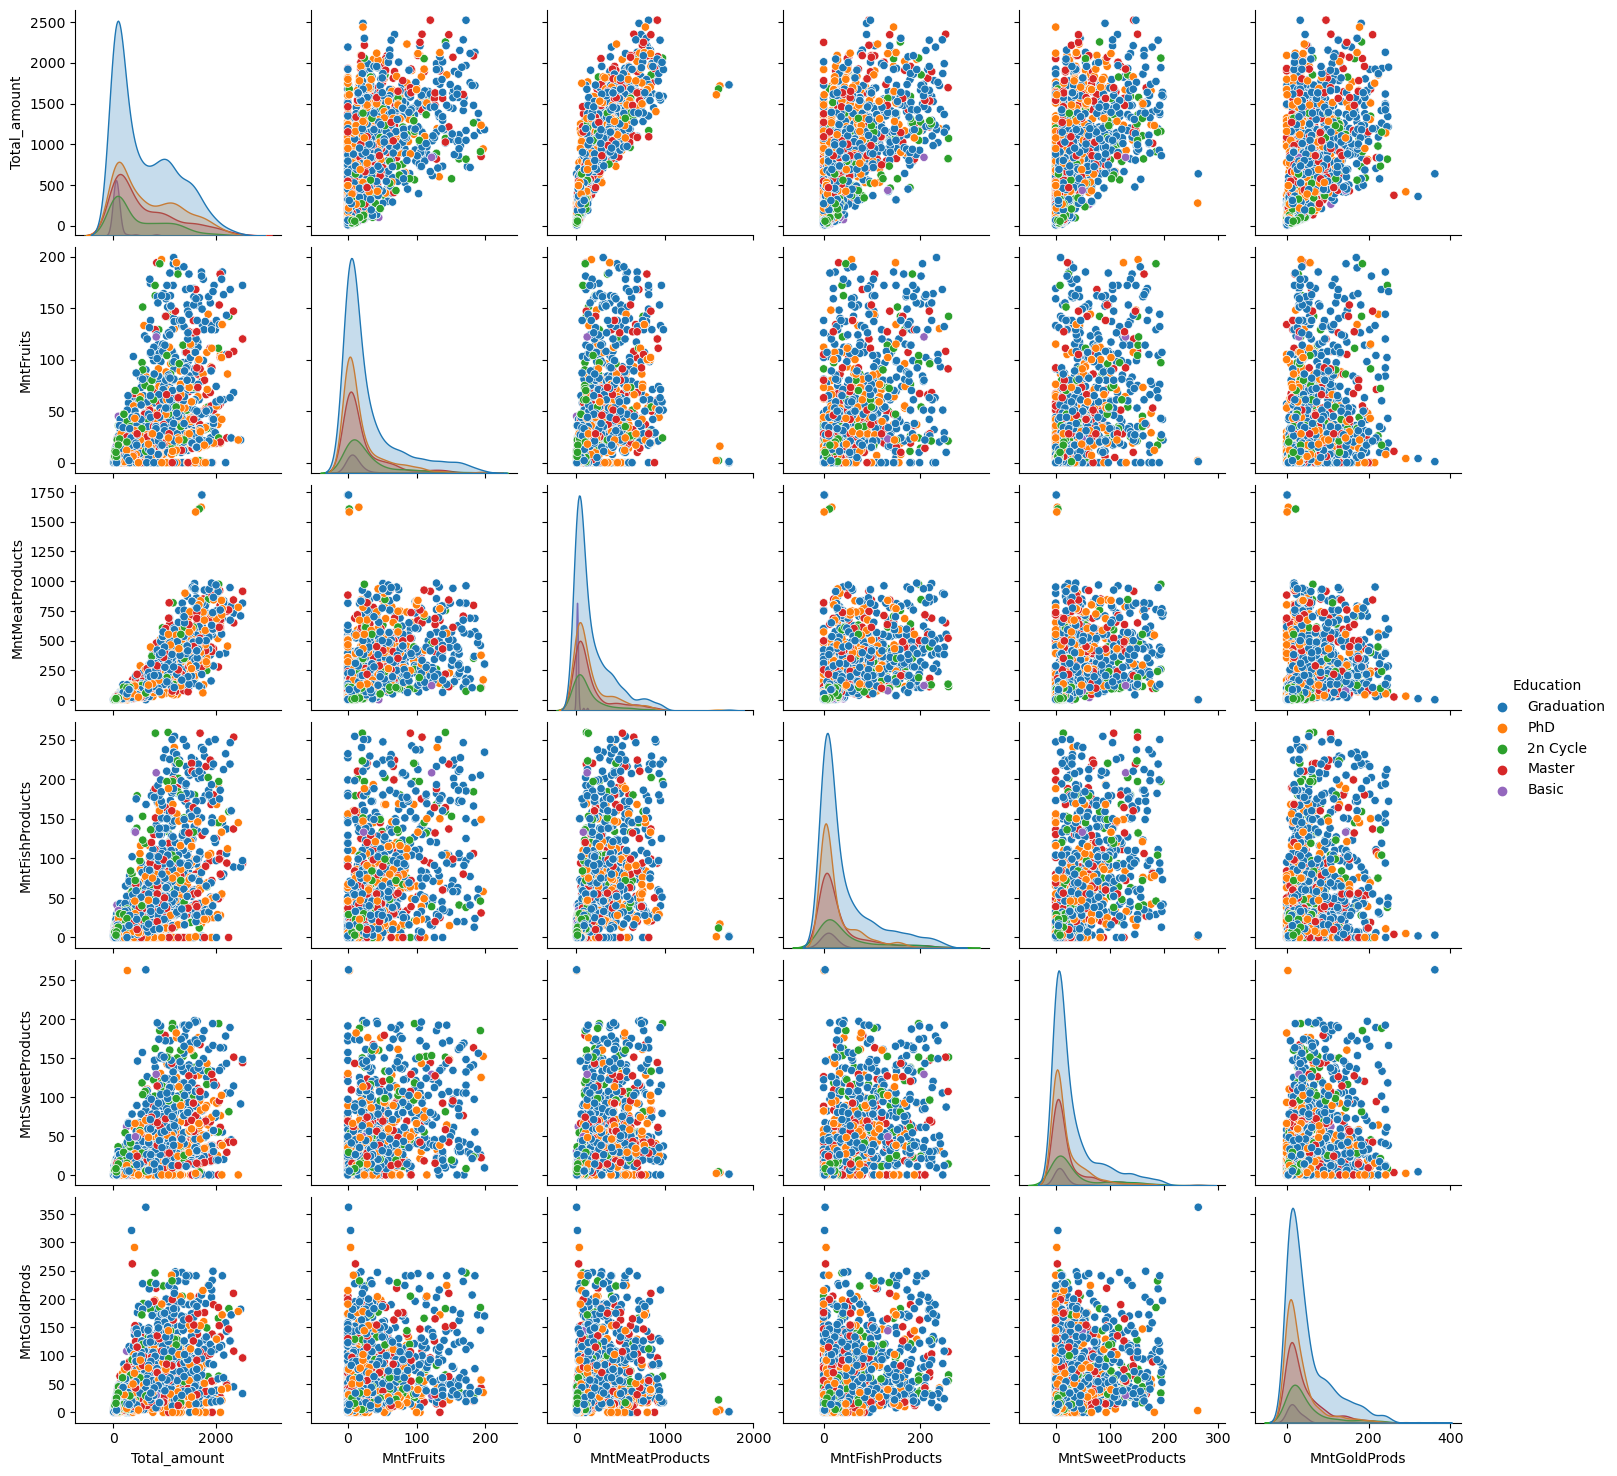

In [528]:
#Solution: 15(ii)
sns.pairplot(file, hue='Education', vars=['Total_amount','MntFruits', 'MntMeatProducts', 'MntFishProducts',
'MntSweetProducts' , 'MntGoldProds'])
#graduation is the educational background that has most of the customers

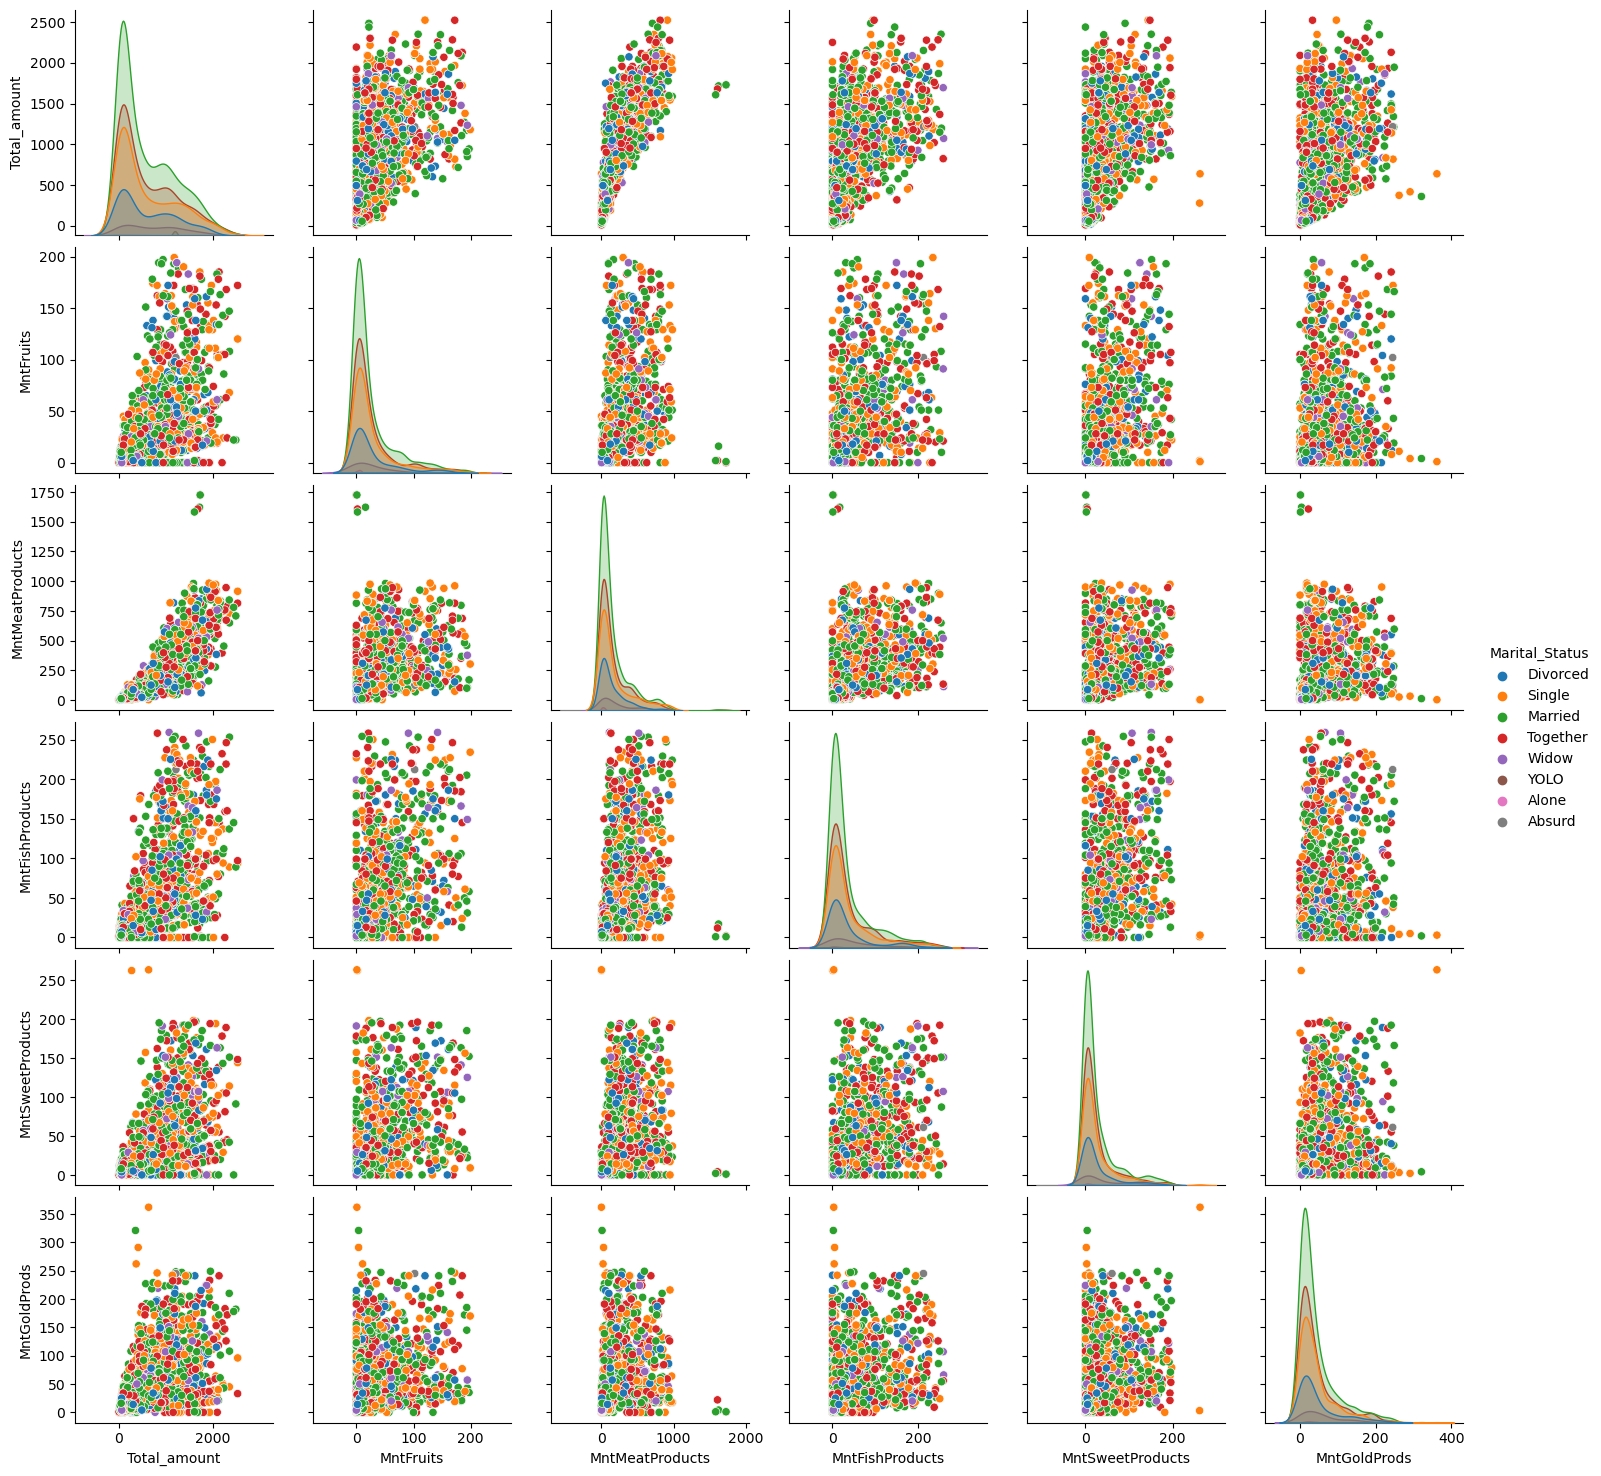

In [529]:
#Solution:15(iii)
sns.pairplot(file, hue='Marital_Status', vars=['Total_amount','MntFruits', 'MntMeatProducts', 'MntFishProducts',
'MntSweetProducts' , 'MntGoldProds'])
#most of the customers are married